# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [2]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. El conjunto de datos contiene informacion de los clientes de un banco que quiere automatizar la decision de otorgar o no prestamos personales.
2. La variable objetivo es una variable binaria que determina si el cliente restituyo lo prestado o no.  
    La etiqueta 1 es para quien no restituye y 0 para quien si paga.
3. Los atributos disponibles son:
+ LOAN    Monto de credito pedido.
+ MORTDUE Monto adeudado en la hipoteca.
+ VALUE   Valor de la propiedad actual.
+ YOJ     Años en el actual trabajo
+ DEROG   Numero de reporte de derogacion
+ DELINQ  Cantidad de lineas de credito morosas.
+ CLAGE   Antiguedad de la mas antigua linea de credito en meses.
+ NINQ    Cantidad de lineas de credito recientes.
+ CLNO    Cantidad de lineas de creditos.
+ DEBTINC Ratio deuda-ingreso.
4. A priori podriamos pensar que LOAN,DELINQ y DEBTINC serian las mas determinantes ya que tienen relacion directa con la posesion o pedido de un prestamo.

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [3]:
from sklearn.linear_model import SGDClassifier
#Instanciamos el modelo
model = SGDClassifier(random_state=0)
model.fit(X_train, y_train)

SGDClassifier(random_state=0)

In [4]:
#Realizamos predicciones para el conjunto test y para el train
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [5]:
from sklearn.metrics import classification_report

print("En test:")
print(classification_report(y_test, y_test_pred))
print("En train:")
print(classification_report(y_train, y_train_pred))

En test:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       313
           1       0.00      0.00      0.00        58

    accuracy                           0.84       371
   macro avg       0.42      0.50      0.46       371
weighted avg       0.71      0.84      0.77       371

En train:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1232
           1       0.00      0.00      0.00       251

    accuracy                           0.83      1483
   macro avg       0.42      0.50      0.45      1483
weighted avg       0.69      0.83      0.75      1483



/Users/aldi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aldi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aldi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aldi/Libr

In [6]:
y_test=y_test.values.reshape(-1,1)

In [7]:
#Realizamos las matrices de confusion

from sklearn.metrics import confusion_matrix

cm1= confusion_matrix(y_test, y_test_pred)
cm2= confusion_matrix(y_train, y_train_pred)

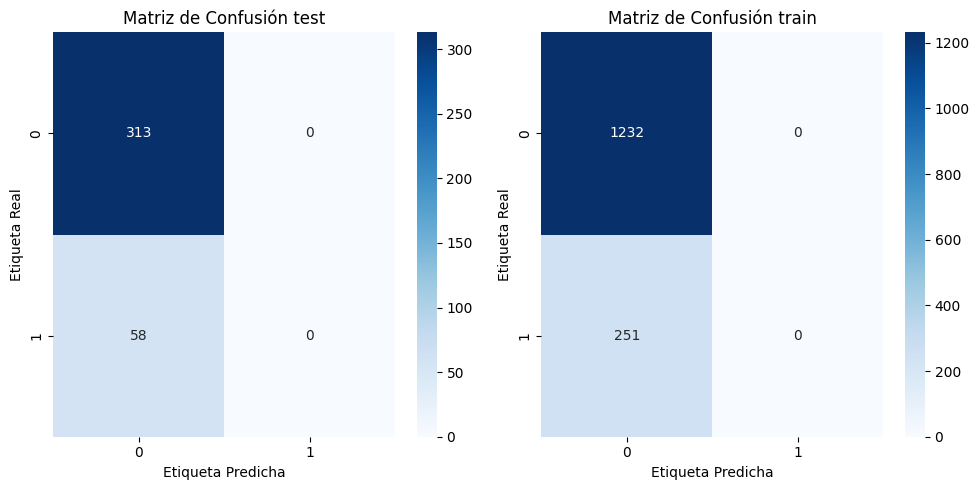

In [8]:

import seaborn as sns

etiquetas = ['0', '1']

# Crear una figura y dos subplots en una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Graficar la primera matriz de confusión en el primer subplot
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='d', xticklabels=etiquetas, yticklabels=etiquetas, ax=axes[0])
axes[0].set_title('Matriz de Confusión test')
axes[0].set_xlabel('Etiqueta Predicha')
axes[0].set_ylabel('Etiqueta Real')

# Graficar la segunda matriz de confusión en el segundo subplot
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='d', xticklabels=etiquetas, yticklabels=etiquetas, ax=axes[1])
axes[1].set_title('Matriz de Confusión train')
axes[1].set_xlabel('Etiqueta Predicha')
axes[1].set_ylabel('Etiqueta Real')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura con las dos matrices de confusión
plt.show()


El modelo parece tener un buen rendimiento en la clasificación de la clase 0, con altas precisiones, recalls y F1-scores en el conjunto de datos de entrenamiento y prueba. Sin embargo, el rendimiento para la clase 1 es muy bajo, con valores de precisión, recall y F1-score iguales a cero. Esto puede indicar un problema en la capacidad del modelo para identificar y clasificar correctamente que un cliente no pago la deuda.

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [9]:
from sklearn.model_selection import ParameterGrid

#Realizamos nuetra grilla de parametros

param_grid = {
    'loss' : ['hinge', 'log_loss','perceptron'],
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2'],
    'learning_rate':['constant','optimal']
}


for params in ParameterGrid(param_grid):
    print(params)
    model = SGDClassifier(**params, random_state=0)

{'alpha': 0.0001, 'learning_rate': 'constant', 'loss': 'hinge', 'penalty': 'l1'}
{'alpha': 0.0001, 'learning_rate': 'constant', 'loss': 'hinge', 'penalty': 'l2'}
{'alpha': 0.0001, 'learning_rate': 'constant', 'loss': 'log_loss', 'penalty': 'l1'}
{'alpha': 0.0001, 'learning_rate': 'constant', 'loss': 'log_loss', 'penalty': 'l2'}
{'alpha': 0.0001, 'learning_rate': 'constant', 'loss': 'perceptron', 'penalty': 'l1'}
{'alpha': 0.0001, 'learning_rate': 'constant', 'loss': 'perceptron', 'penalty': 'l2'}
{'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l1'}
{'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2'}
{'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'log_loss', 'penalty': 'l1'}
{'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'log_loss', 'penalty': 'l2'}
{'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'perceptron', 'penalty': 'l1'}
{'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'perceptron', 'penalty': 'l2'}
{'

In [10]:
from sklearn.model_selection import GridSearchCV

#Usando grid search con un cross-validation de 5 folds entrenamos todos los modelos segun nuestra grilla de parametros

model = SGDClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
cv.fit(X,y );


/Users/aldi/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aldi/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aldi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 892, in fit
    self._more_validate_params()
  File "/Users/aldi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 149, i

In [11]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']


for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['loss']}\t{p['alpha']}\t{p['penalty']}\t{p['learning_rate']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

hinge	0.0001	l1	constant	| nan	nan	19
hinge	0.0001	l2	constant	| nan	nan	19
log_loss	0.0001	l1	constant	| nan	nan	19
log_loss	0.0001	l2	constant	| nan	nan	19
perceptron	0.0001	l1	constant	| nan	nan	19
perceptron	0.0001	l2	constant	| nan	nan	19
hinge	0.0001	l1	optimal	| 0.79	0.09	8
hinge	0.0001	l2	optimal	| 0.74	0.17	10
log_loss	0.0001	l1	optimal	| 0.83	0.01	3
log_loss	0.0001	l2	optimal	| 0.69	0.26	16
perceptron	0.0001	l1	optimal	| 0.79	0.09	8
perceptron	0.0001	l2	optimal	| 0.74	0.17	10
hinge	0.001	l1	constant	| nan	nan	19
hinge	0.001	l2	constant	| nan	nan	19
log_loss	0.001	l1	constant	| nan	nan	19
log_loss	0.001	l2	constant	| nan	nan	19
perceptron	0.001	l1	constant	| nan	nan	19
perceptron	0.001	l2	constant	| nan	nan	19
hinge	0.001	l1	optimal	| 0.83	0.00	1
hinge	0.001	l2	optimal	| 0.74	0.17	10
log_loss	0.001	l1	optimal	| 0.81	0.05	7
log_loss	0.001	l2	optimal	| 0.69	0.26	16
perceptron	0.001	l1	optimal	| 0.83	0.00	1
perceptron	0.001	l2	optimal	| 0.74	0.17	10
hinge	0.01	l1	constant	| nan	n

In [12]:
#Ordenamos en un dataframe segun su rank de puntuacion

df = pd.DataFrame(results)
df[['param_loss', 'param_alpha', 'param_penalty', 'param_learning_rate', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_loss,param_alpha,param_penalty,param_learning_rate,mean_test_score,std_test_score,rank_test_score
18,hinge,0.001,l1,optimal,0.829561,0.004526,1
22,perceptron,0.001,l1,optimal,0.829561,0.004526,1
8,log_loss,0.0001,l1,optimal,0.827404,0.007722,3
30,hinge,0.01,l1,optimal,0.816084,0.024122,4
34,perceptron,0.01,l1,optimal,0.816084,0.024122,4
32,log_loss,0.01,l1,optimal,0.813388,0.035022,6
20,log_loss,0.001,l1,optimal,0.805299,0.048363,7
6,hinge,0.0001,l1,optimal,0.787512,0.085313,8
10,perceptron,0.0001,l1,optimal,0.787512,0.085313,8
35,perceptron,0.01,l2,optimal,0.743610,0.173207,10


In [13]:
#Instanciamos el modelo ganador
model = SGDClassifier(loss='hinge',alpha=0.001,penalty='l1',learning_rate='optimal',random_state=0)
model.fit(X_train, y_train)

SGDClassifier(alpha=0.001, penalty='l1', random_state=0)

In [14]:
#Realizamos predicciones para el conjunto test y para el train
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report

print("En test:")
print(classification_report(y_test, y_test_pred))
print("En train:")
print(classification_report(y_train, y_train_pred))

En test:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       313
           1       0.00      0.00      0.00        58

    accuracy                           0.84       371
   macro avg       0.42      0.50      0.46       371
weighted avg       0.71      0.84      0.77       371

En train:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1232
           1       0.00      0.00      0.00       251

    accuracy                           0.83      1483
   macro avg       0.42      0.50      0.45      1483
weighted avg       0.69      0.83      0.75      1483



/Users/aldi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aldi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aldi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aldi/Libr

In [16]:
#Realizamos las matrices de consfusion

from sklearn.metrics import confusion_matrix

cm1= confusion_matrix(y_test, y_test_pred)
cm2= confusion_matrix(y_train, y_train_pred)

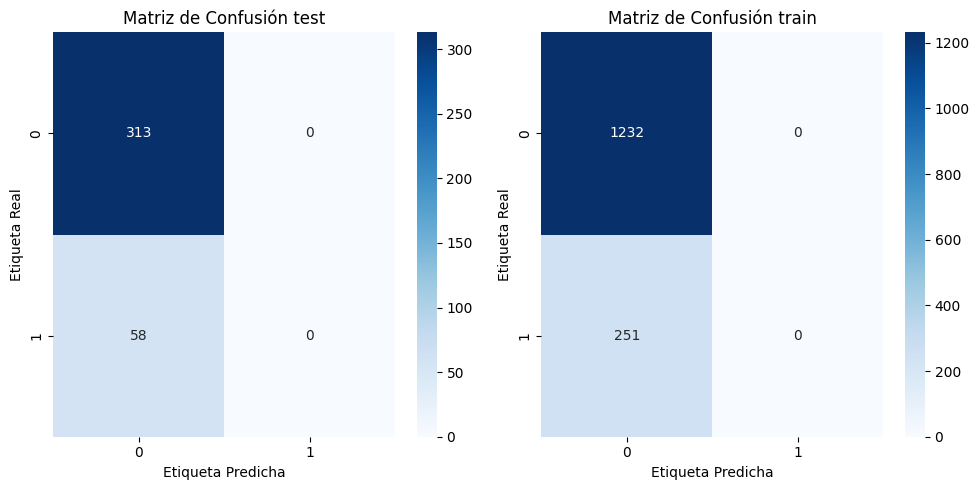

In [17]:
etiquetas = ['0', '1']

# Crear una figura y dos subplots en una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Graficar la primera matriz de confusión en el primer subplot
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='d', xticklabels=etiquetas, yticklabels=etiquetas, ax=axes[0])
axes[0].set_title('Matriz de Confusión test')
axes[0].set_xlabel('Etiqueta Predicha')
axes[0].set_ylabel('Etiqueta Real')

# Graficar la segunda matriz de confusión en el segundo subplot
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='d', xticklabels=etiquetas, yticklabels=etiquetas, ax=axes[1])
axes[1].set_title('Matriz de Confusión train')
axes[1].set_xlabel('Etiqueta Predicha')
axes[1].set_ylabel('Etiqueta Real')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura con las dos matrices de confusión
plt.show()


Vemos que el modelo sigue experimentando problemas para predecir la etiqueta 1.

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [18]:
from sklearn.tree import DecisionTreeClassifier
#Instanciamos el modelo
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
#Realizamos predicciones para el conjunto test y para el train
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [20]:
print("En test:")
print(classification_report(y_test, y_test_pred))
print("En train:")
print(classification_report(y_train, y_train_pred))

En test:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.77      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371

En train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



In [22]:
#Realizamos las matrices de confusion

cm1= confusion_matrix(y_test, y_test_pred)
cm2= confusion_matrix(y_train, y_train_pred)

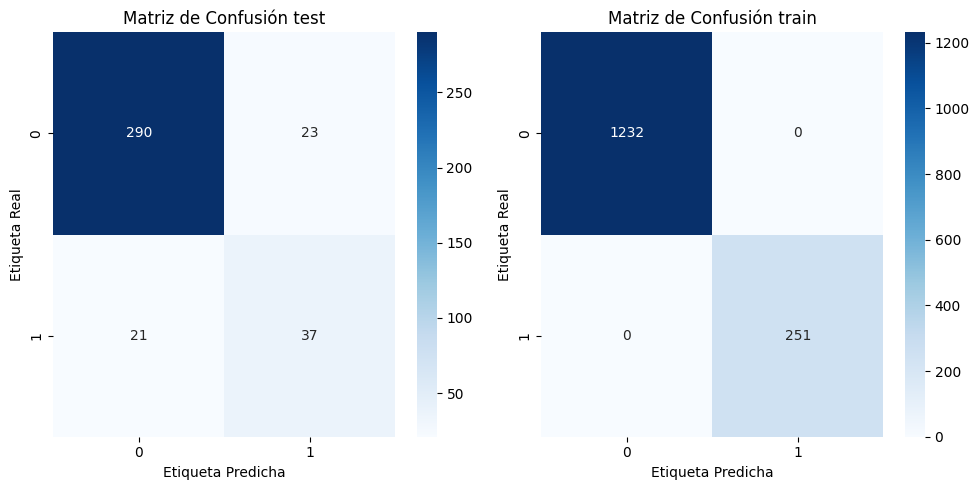

In [23]:
etiquetas = ['0', '1']

# Crear una figura y dos subplots en una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Graficar la primera matriz de confusión en el primer subplot
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='d', xticklabels=etiquetas, yticklabels=etiquetas, ax=axes[0])
axes[0].set_title('Matriz de Confusión test')
axes[0].set_xlabel('Etiqueta Predicha')
axes[0].set_ylabel('Etiqueta Real')

# Graficar la segunda matriz de confusión en el segundo subplot
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='d', xticklabels=etiquetas, yticklabels=etiquetas, ax=axes[1])
axes[1].set_title('Matriz de Confusión train')
axes[1].set_xlabel('Etiqueta Predicha')
axes[1].set_ylabel('Etiqueta Real')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura con las dos matrices de confusión
plt.show()

El modelo muestra un rendimiento sólido en el conjunto de datos de prueba. Tiene altas precisiones, recalls y F1-scores para ambas clases, lo que indica una buena capacidad del modelo para clasificar correctamente ejemplos tanto de la clase 0 como de la clase 1. En el conjunto de datos de entrenamiento, el modelo muestra un rendimiento perfecto, lo que indica que el modelo sufre de overfitting.

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [26]:
#Realizamos nuetra grilla de parametros

param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth' : [1, 2]
}


for params in ParameterGrid(param_grid):
    print(params)
    model = DecisionTreeClassifier(**params, random_state=0)

{'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'log2', 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'log2', 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'splitter': 'random'}
{'cr

In [27]:
#Usando grid search con un cross-validation de 5 folds entrenamos todos los modelos segun nuestra grilla de parametros

model = DecisionTreeClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
cv.fit(X,y );

/Users/aldi/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aldi/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aldi/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aldi/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

In [29]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']


for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['criterion']}\t{p['splitter']}\t{p['max_features']}\t{p['max_depth']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

gini	best	auto	1	| 0.87	0.01	1
gini	random	auto	1	| 0.83	0.00	19
gini	best	sqrt	1	| 0.87	0.01	1
gini	random	sqrt	1	| 0.83	0.00	19
gini	best	log2	1	| 0.87	0.01	1
gini	random	log2	1	| 0.83	0.00	19
gini	best	auto	2	| 0.87	0.01	10
gini	random	auto	2	| 0.83	0.00	19
gini	best	sqrt	2	| 0.87	0.01	10
gini	random	sqrt	2	| 0.83	0.00	19
gini	best	log2	2	| 0.87	0.01	10
gini	random	log2	2	| 0.83	0.00	19
entropy	best	auto	1	| 0.87	0.01	1
entropy	random	auto	1	| 0.83	0.00	19
entropy	best	sqrt	1	| 0.87	0.01	1
entropy	random	sqrt	1	| 0.83	0.00	19
entropy	best	log2	1	| 0.87	0.01	1
entropy	random	log2	1	| 0.83	0.00	19
entropy	best	auto	2	| 0.86	0.01	13
entropy	random	auto	2	| 0.83	0.00	19
entropy	best	sqrt	2	| 0.86	0.01	13
entropy	random	sqrt	2	| 0.83	0.00	19
entropy	best	log2	2	| 0.86	0.01	13
entropy	random	log2	2	| 0.83	0.00	19
log_loss	best	auto	1	| 0.87	0.01	1
log_loss	random	auto	1	| 0.83	0.00	19
log_loss	best	sqrt	1	| 0.87	0.01	1
log_loss	random	sqrt	1	| 0.83	0.00	19
log_loss	best	log2	1	| 0.87	0.01

In [30]:
#Ordenamos en un dataframe segun su rank de puntuacion

df = pd.DataFrame(results)
df[['param_criterion', 'param_splitter', 'param_max_features', 'param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_criterion,param_splitter,param_max_features,param_max_depth,mean_test_score,std_test_score,rank_test_score
0,gini,best,auto,1,0.869481,0.014250,1
16,entropy,best,log2,1,0.869481,0.014250,1
26,log_loss,best,sqrt,1,0.869481,0.014250,1
14,entropy,best,sqrt,1,0.869481,0.014250,1
12,entropy,best,auto,1,0.869481,0.014250,1
24,log_loss,best,auto,1,0.869481,0.014250,1
28,log_loss,best,log2,1,0.869481,0.014250,1
4,gini,best,log2,1,0.869481,0.014250,1
2,gini,best,sqrt,1,0.869481,0.014250,1
8,gini,best,sqrt,2,0.867316,0.012204,10


In [31]:
#Instanciamos el modelo ganador
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_features='auto', max_depth= 1, random_state=0)
model.fit(X_train, y_train)

/Users/aldi/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_depth=1, max_features='auto', random_state=0)

In [32]:
#Realizamos predicciones para el conjunto test y para el train
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [33]:
print("En test:")
print(classification_report(y_test, y_test_pred))
print("En train:")
print(classification_report(y_train, y_train_pred))

En test:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       313
           1       0.85      0.29      0.44        58

    accuracy                           0.88       371
   macro avg       0.87      0.64      0.68       371
weighted avg       0.88      0.88      0.86       371

En train:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1232
           1       0.91      0.27      0.41       251

    accuracy                           0.87      1483
   macro avg       0.89      0.63      0.67      1483
weighted avg       0.88      0.87      0.84      1483



In [34]:
#Realizamos las matrices de confusion

cm1= confusion_matrix(y_test, y_test_pred)
cm2= confusion_matrix(y_train, y_train_pred)

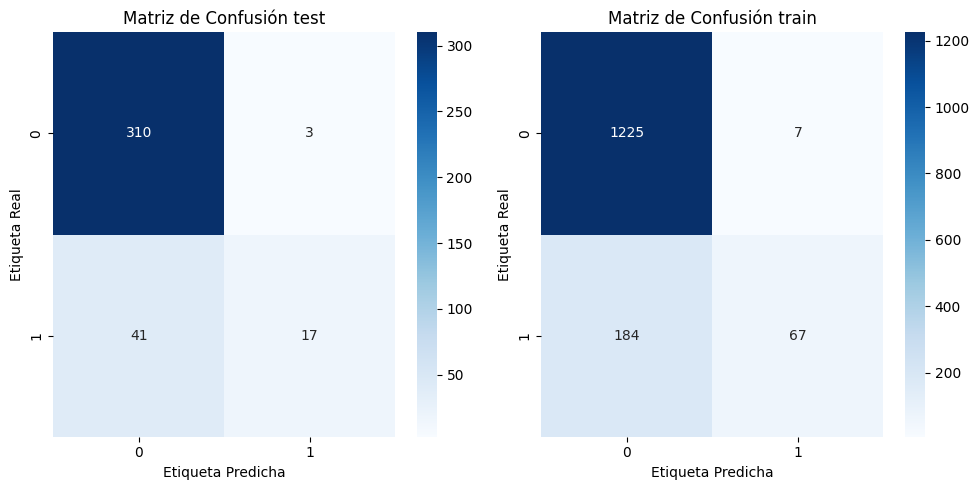

In [35]:
etiquetas = ['0', '1']

# Crear una figura y dos subplots en una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Graficar la primera matriz de confusión en el primer subplot
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='d', xticklabels=etiquetas, yticklabels=etiquetas, ax=axes[0])
axes[0].set_title('Matriz de Confusión test')
axes[0].set_xlabel('Etiqueta Predicha')
axes[0].set_ylabel('Etiqueta Real')

# Graficar la segunda matriz de confusión en el segundo subplot
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='d', xticklabels=etiquetas, yticklabels=etiquetas, ax=axes[1])
axes[1].set_title('Matriz de Confusión train')
axes[1].set_xlabel('Etiqueta Predicha')
axes[1].set_ylabel('Etiqueta Real')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura con las dos matrices de confusión
plt.show()

El modelo ahora performa mejor y se eliminó el sobreajuste tan notorio.